<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/DBScan_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised Machine Learning**: `DBSCAN`



The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. **A cluster is therefore a set of core samples, each close to each other and a set of non-core samples that are close to a core sample**.

There are two parameters to the algorithm, `min_samples` and `eps`, which define formally what we mean when we say dense. Higher min_samples or lower eps indicate higher density necessary to form a cluster. More formally, **we define a core sample as being a sample in the dataset such that there exist min_samples other samples within a distance of eps, which are defined as neighbors of the core sample**.

While the parameter `min_samples` primarily controls how tolerant the algorithm is towards noise (on noisy and large data sets it may be desirable to increase this parameter), the parameter `eps` is crucial to choose appropriately for the data set and distance function and usually cannot be left at the default value. It controls the local neighborhood of the points. When chosen too small, most data will not be clustered at all (and labeled as -1 for “noise”). When chosen too large, it causes close clusters to be merged into one cluster, and eventually the entire data set to be returned as a single cluster. Some heuristics for choosing this parameter have been discussed in the literature, for example based on a knee in the nearest neighbor distances plot

**Example: Synthesis Dataset**

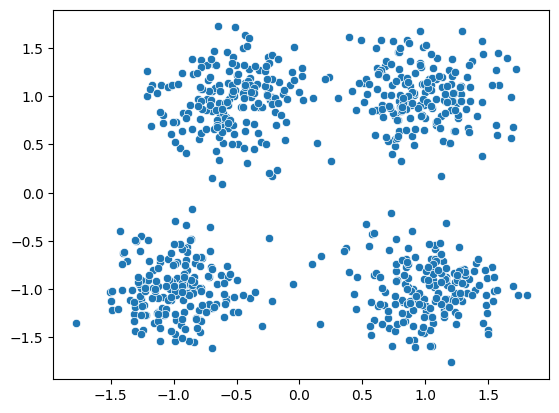

In [1]:
# Synthesis dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

centers = [[1,1],[-0.5,1],[-1,-1],[1,-1]]

X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.3, random_state=0)

sns.scatterplot(x=X[:, 0],y=X[:,1])

plt.show()

**Building a DBSCAN using** `scikit-learn`

We now have all of the pieces to make DBSCAN using scikit learn library.

In [2]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X_scale = scaler.transform(X)

We initialize sklearn.cluster.DBSCAN and fit the density-based clustering from features or distance matrix

In [3]:
# Fitting
from sklearn.cluster import DBSCAN

# define model
model = DBSCAN(eps=0.3, min_samples=20)

model.fit(X_scale)

labels = model.labels_


One can access the labels assigned by DBSCAN using the labels_ attribute.Noisy samples are given the label math: -1.

In [4]:
# Number of cluster less from noise
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

n_noise = list(labels).count(-1)

print(f'estimated number of cluster : {n_clusters}')
print(f'estimated number of noise : {n_noise}')

estimated number of cluster : 4
estimated number of noise : 24


Core samples (large dots) and non-core samples (small dots) are color-coded according to assigned cluster. Samples tagged as noise are represented in black.

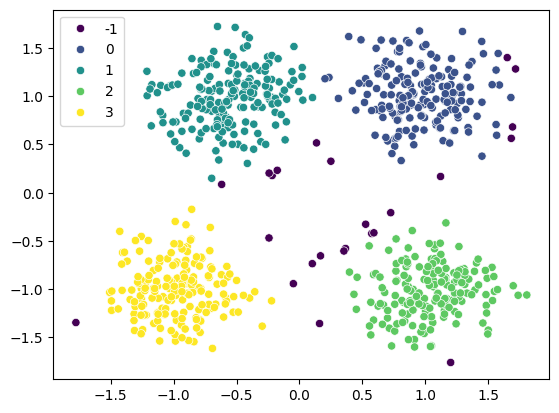

In [5]:
legend = ['noise','0','1','2','3']
sns.scatterplot(x=X[:,0],y=X[:,1],hue=labels,palette='viridis')


plt.show()

In [6]:
pd.Series(labels).value_counts()

,count
0,184
3,184
1,181
2,177
-1,24


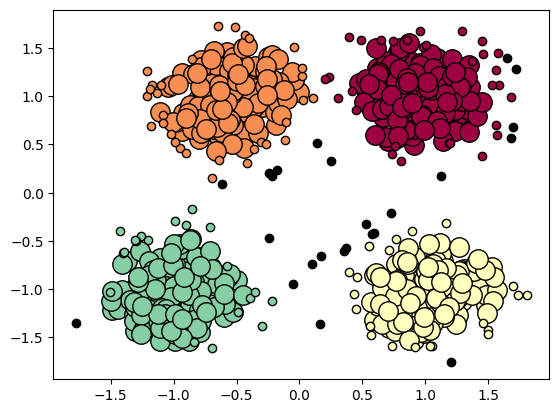

In [7]:
unique_labels = set(labels)

core_smaples_mask = np.zeros_like(labels, dtype=bool)

core_smaples_mask[model.core_sample_indices_] = True
core_smaples_mask


colors = [plt.cm.Spectral(each) for each in np.linspace(0,1, len(unique_labels))]


for k, col in zip(unique_labels, colors) :
    if k == -1:
        col = 'k'

    class_member_mask = (labels == k)
    # core
    xy = X[class_member_mask & core_smaples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        'o',
        markerfacecolor=col,
        markeredgecolor='k',
        markersize=14
    )

    xy = X[class_member_mask & ~core_smaples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        'o',
        markerfacecolor=col,
        markeredgecolor='k',
        markersize=6
    )

`Optimizing minimum samples and epsilon`

In [8]:
from sklearn.metrics import silhouette_score


epsilon = [0.2,0.3,0.4,0.5]
minsamples = [10,15,20,25,30]

nilai_epsilon = []
nilai_minsample = []
scores = []

n_clusters = []
n_members = []


for eps in epsilon :
    for sample in minsamples:


        model = DBSCAN(eps=eps, min_samples=sample)


        labels = model.fit_predict(X_scale)

        try:
            score = silhouette_score(X_scale,labels)
        except:
            score = None

        nilai_epsilon.append(eps)
        nilai_minsample.append(sample)
        scores.append(score)

        n_clusters.append(list(np.unique(labels)))
        n_members.append(list(np.bincount(labels+1)))

In [9]:
pd.DataFrame({
    'Epsilon' : nilai_epsilon,
    'min samples' : nilai_minsample,
    'Silhoute' : scores,
    'Cluster' : n_clusters,
    'Number of members' : n_members
}).sort_values('Silhoute',ascending=False)

,Epsilon,min samples,Silhoute,Cluster,Number of members
6,0.3,15,0.652169,"[-1, 0, 1, 2, 3]","[16, 185, 183, 182, 184]"
7,0.3,20,0.644272,"[-1, 0, 1, 2, 3]","[24, 184, 181, 177, 184]"
8,0.3,25,0.643191,"[-1, 0, 1, 2, 3]","[35, 179, 180, 180, 176]"
9,0.3,30,0.630772,"[-1, 0, 1, 2, 3]","[50, 174, 173, 179, 174]"
0,0.2,10,0.619257,"[-1, 0, 1, 2, 3]","[56, 170, 175, 170, 179]"
19,0.5,30,0.586384,"[0, 1, 2]","[0, 376, 188, 186]"
18,0.5,25,0.586384,"[0, 1, 2]","[0, 376, 188, 186]"
1,0.2,15,0.561210,"[-1, 0, 1, 2, 3]","[100, 164, 155, 169, 162]"
5,0.3,10,0.512498,"[-1, 0, 1, 2]","[8, 374, 184, 184]"
2,0.2,20,0.487426,"[-1, 0, 1, 2, 3]","[148, 147, 141, 164, 150]"


📝 **Interpretation**

**Best configuration** seems to be eps=0.3, min_samples=15–25

* Produces 4 stable clusters + small noise.

* High silhouette score (>0.64).

* Balanced cluster sizes (≈180 points per cluster).

* Low noise proportion (<5%).

**Too small epsilon** (eps=0.2)

* Overly strict: considers many points as noise.

* Silhouette score sometimes decent (0.61) but impractical (too many discarded points).

**Too large epsilon** (eps=0.5)

* Too lenient: merges clusters together.

* Silhouette drops (<0.59).

* Cluster interpretability decreases.


**Conclusion**

* Optimal DBSCAN parameters: eps ≈ 0.3, min_samples ≈ 15–25.

* This setup gives well-separated, balanced clusters with minimal noise.

* Increasing min_samples makes DBSCAN stricter (slightly more noise, but still acceptable).

* Too low or too high eps leads to poor results (either too many noise points or too few clusters).